In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('openpowerlifting.csv', low_memory = False)

Tutorial:
1) Introduce the subject of powerlifting and ipf standardization. 
2) Show how to attain and prepare data to only look at ipf data
3) Split the data by sex and discuss shortly the policies of ipf regarding sex
4) Introduce questions we have regarding the subject
5) Take an example set like the junior league to best answer these questions


In [4]:
data.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


Powerlifting competitions consist of three main event: the squat (S), bench (B), and deadlift (D). Athletes are given a maximum of three attempts at each event and the highest, successful lift will count towards their total score (TotalKg) for the event. The winner of the event is the athlete with the highest score and everyone receives a placement (in 'Place'). In the case two athletes tie, the lifter with the lightest bodyweight wins.

Athlete competitions are typically split by sex, body weight, age, and equipment. Competitions are first broken into male and female competitions. USAPowerlifting have released participation policies for transgender athletes which allow them to compete under certain circumstances. Once athletes are divided by sex, they are typically split into age groups. Sub-Junior is for athletes between 14 and 18. Junior for athletes between 19 and 23. Masters I is 30-39, Masters II is 40-49, and up to Masters IV which is 70 and above. Any athlete is also elgible to join the Open division for all ages above 14.

Once an athlete has entered an age category, they are then split into bodyweight categories. The men's competition has weight classes: up to 59.0kg, a 59.01kg - 66.00kg, 66.01kg - 74.00kg, 74.01kg - 83.00kg, 83.01kg - 93.00kg, 93.01kg - 105.00kg, 105.01kg - 120.00kg, and 120.01kg+ class. The Sub-Junior and Junior class are unique such that they have an additional class with a weight limit of up to 53.0kg.

An athletes placing can be a positive number, which is just the place the athlete came in. If it's G, it means the lifter has successful lifts but wasn't elgible for rewards. DQ means the lifter was disqualified for failed attempts / procedural reasons. DD is a doping disqualification, meaning the athlete failed a drug test. Finally, NS is a No-Show athlete. 

We will be looking exclusively at events organized by the International Powerlifting Federation (IPF) or its affiliates. These events allow lifters to compete in different divisisions nationally and internationally. The IPF also has the most detailed information on categories, successful lifts, and placements. 

In [5]:
data_ipf = data[data['ParentFederation'] == 'IPF']

In [6]:
data_ipf.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
4459,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4460,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4461,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4462,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4463,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [7]:
ipf_female = data_ipf[data_ipf['Sex'] == 'F']
ipf_male = data_ipf[data_ipf['Sex'] == 'M']

The next category of these events are age classes. Although the IPF age classes are dividied in the Division column, the documentation for the data recommends we still use the AgeClass column to do so 

In [8]:
data_ipf['AgeClass'].unique()

array(['35-39', '24-34', nan, '45-49', '50-54', '40-44', '18-19', '13-15',
       '16-17', '60-64', '20-23', '65-69', '55-59', '70-74', '75-79',
       '5-12', '80-999'], dtype=object)

In [9]:
male_subjunior = ipf_male[(ipf_male['AgeClass'] == '16-17') | ((ipf_male['AgeClass'] == '13-15') & (ipf_male['Age'] >= 14))]

In [10]:
male_junior = ipf_male[(ipf_male['AgeClass'] == '18-19') | (ipf_male['AgeClass'] == '20-23')]

In [11]:
male_master1 = ipf_male[(ipf_male['AgeClass'] == '40-44') | (ipf_male['AgeClass'] == '45-49')]

In [12]:
male_master2 = ipf_male[(ipf_male['AgeClass'] == '50-54') | (ipf_male['AgeClass'] == '55-59')]

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

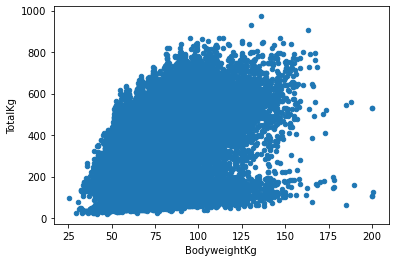

In [13]:
male_subjunior.plot.scatter(x = 'BodyweightKg', y = 'TotalKg')

<AxesSubplot:xlabel='BodyweightKg', ylabel='Best3SquatKg'>

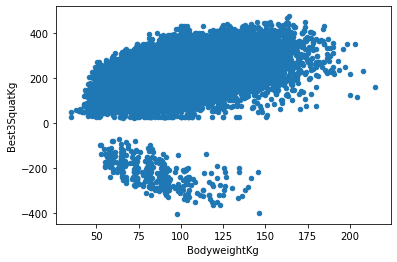

In [14]:
male_junior.plot.scatter(x = 'BodyweightKg', y = 'Best3SquatKg')

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

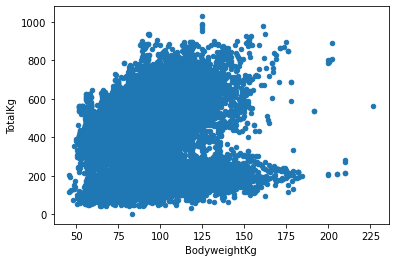

In [15]:
male_master2.plot.scatter(x = 'BodyweightKg', y = 'TotalKg')

What events are lifters most likely to fail?
Do lifters with equipment allowed tend to fail more on lifts?
How has attendance increased for different genders and age groups?
What category is the strongest?
What is the distribution of weight for people in different weight classes (Do people tend to skim the top of the weightclass)?
Prediction of successful lift and bodyweight
When failing a lift, do athletes increase the weight or decrease the weight
by weight (1 < 2 < 3 | 3 < 2 < 1 | some combo)

We want to determine the failure rate of these events. 

In [24]:
failed_squat = len(ipf_male[ipf_male['Squat1Kg'] < 0]) + len(ipf_male[ipf_male['Squat2Kg'] < 0]) + len(ipf_male[ipf_male['Squat3Kg'] < 0])

In [25]:
total_squat = len(ipf_male[(ipf_male['Squat1Kg'] >= 0) | (ipf_male['Squat1Kg'] < 0)]) + len(ipf_male[(ipf_male['Squat2Kg'] >= 0) | (ipf_male['Squat2Kg'] < 0)]) + len(ipf_male[(ipf_male['Squat3Kg'] >= 0) | (ipf_male['Squat3Kg'] < 0)])

In [27]:
failed_squat / total_squat * 100

24.726595552597384

In [28]:
failed_bench = len(ipf_male[ipf_male['Bench1Kg'] < 0]) + len(ipf_male[ipf_male['Bench2Kg'] < 0]) + len(ipf_male[ipf_male['Bench3Kg'] < 0])

In [30]:
total_bench = len(ipf_male[(ipf_male['Bench1Kg'] >= 0) | (ipf_male['Bench1Kg'] < 0)]) + len(ipf_male[(ipf_male['Bench2Kg'] >= 0) | (ipf_male['Bench2Kg'] < 0)]) + len(ipf_male[(ipf_male['Bench3Kg'] >= 0) | (ipf_male['Bench3Kg'] < 0)])

In [31]:
failed_bench / total_bench * 100

31.064278667613404

In [33]:
failed_deadlift = len(ipf_male[ipf_male['Deadlift1Kg'] < 0]) + len(ipf_male[ipf_male['Deadlift2Kg'] < 0]) + len(ipf_male[ipf_male['Deadlift3Kg'] < 0])

In [34]:
total_deadlift = len(ipf_male[(ipf_male['Deadlift1Kg'] >= 0) | (ipf_male['Deadlift1Kg'] < 0)]) + len(ipf_male[(ipf_male['Deadlift2Kg'] >= 0) | (ipf_male['Deadlift2Kg'] < 0)]) + len(ipf_male[(ipf_male['Deadlift3Kg'] >= 0) | (ipf_male['Deadlift3Kg'] < 0)])

In [35]:
failed_deadlift / total_deadlift * 100

21.78941153776458